In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

data_dir = "D:/Naruto/"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))

#Load using keras.preprocessing
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

# Create the model
num_classes = 7

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




#Train the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
print("Saving Model:")
model.save('D:/Naruto/Anime_Model/Anime') 
#model = tf.keras.models.load_model('D:/Python/Model_Folder/Flower_vs_Animal')





Found 111 files belonging to 7 classes.
Using 89 files for training.
Found 111 files belonging to 7 classes.
Using 22 files for validation.
0.0 0.9962408
Epoch 1/10
3/3 [==============================] - 3s 955ms/step - loss: 2.8212 - accuracy: 0.1685 - val_loss: 1.9412 - val_accuracy: 0.2273
Epoch 2/10
3/3 [==============================] - 2s 628ms/step - loss: 1.9015 - accuracy: 0.2360 - val_loss: 1.8797 - val_accuracy: 0.3636
Epoch 3/10
3/3 [==============================] - 2s 633ms/step - loss: 1.8654 - accuracy: 0.3258 - val_loss: 1.8949 - val_accuracy: 0.2273
Epoch 4/10
3/3 [==============================] - 2s 641ms/step - loss: 1.7749 - accuracy: 0.3820 - val_loss: 1.9091 - val_accuracy: 0.1364
Epoch 5/10
3/3 [==============================] - 2s 654ms/step - loss: 1.6431 - accuracy: 0.4157 - val_loss: 2.0141 - val_accuracy: 0.1364
Epoch 6/10
3/3 [==============================] - 2s 583ms/step - loss: 1.4591 - accuracy: 0.4719 - val_loss: 1.9504 - val_accuracy: 0.4091
Epoch 

This image most likely belongs to Kakashi_Hatake with a 44.73 percent confidence.
Actual Image :


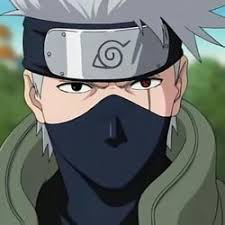

In [3]:
img = keras.preprocessing.image.load_img(
    'D:/Naruto/Kakashi_Hatake/images.jpg', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("Actual Image :")
PIL.Image.open("D:/Naruto/Kakashi_Hatake/images.jpg")

This image most likely belongs to Hinata_Hyuga with a 90.45 percent confidence.
Actual Image :


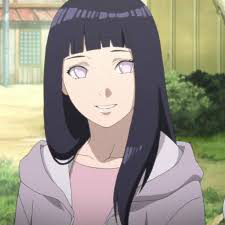

In [5]:
img = keras.preprocessing.image.load_img(
    'D:/Naruto/Hinata_Hyuga/images (2).jpg', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("Actual Image :")
PIL.Image.open("D:/Naruto/Hinata_Hyuga/images (2).jpg")

This image most likely belongs to Itachi_Uchiha with a 86.80 percent confidence.
Actual Image :


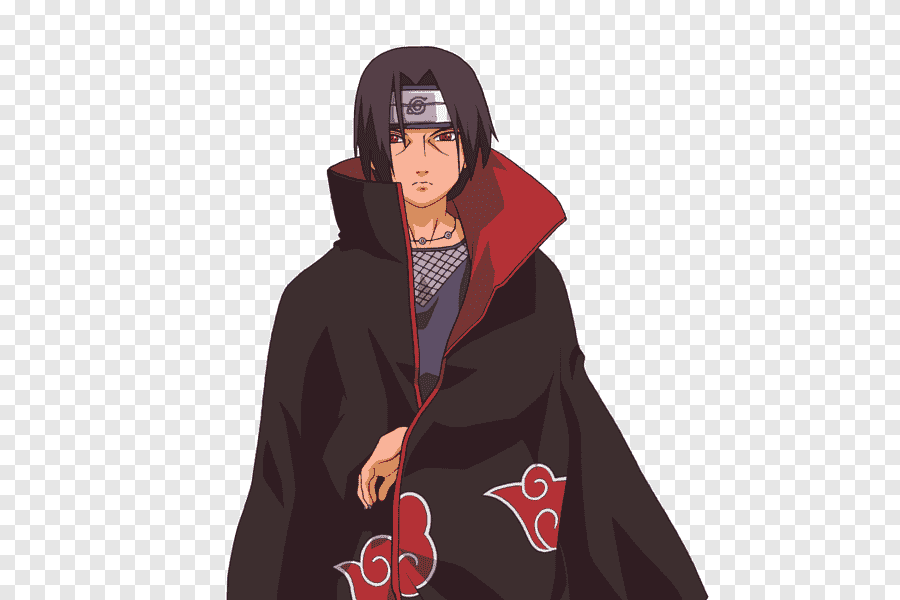

In [6]:
img = keras.preprocessing.image.load_img(
    'D:/Naruto/Itachi_Uchiha/1.png', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("Actual Image :")
PIL.Image.open("D:/Naruto/Itachi_Uchiha/1.png")

This image most likely belongs to Naruto_Uzumaki with a 26.99 percent confidence.
Actual Image :


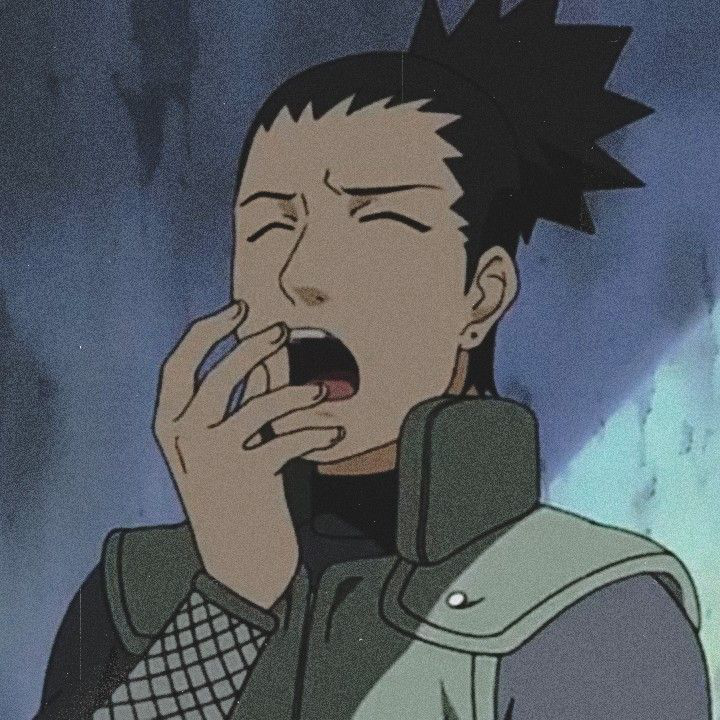

In [7]:

img = keras.preprocessing.image.load_img(
    'D:/Naruto/Shikamaru_Nara/shika (2).jpg', target_size=(img_height, img_width)
)

# convert image to tensor or numpy
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print("Actual Image :")
PIL.Image.open("D:/Naruto/Shikamaru_Nara/shika (2).jpg")